In [4]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import math


In [5]:
csvpath = ("oil_sentiments_vs_prices.csv")
df = pd.read_csv(csvpath)

df.head()


,Unnamed: 0,Unnamed: 0.1,Date,Media Sources,Tweet Polarity,Ticker,date,Price
0,0,0,2018-01-03,@MarathonPetroCo,0.23845,MPC,2018-01-03,68.61
1,1,1,2018-01-04,@DevonEnergy,-0.09200,DVN,2018-01-04,43.23
2,2,2,2018-01-04,@MarathonPetroCo,0.21230,MPC,2018-01-04,68.68
3,3,3,2018-01-04,@OPECnews,0.49390,USO,2018-01-04,12.37
4,4,4,2018-01-05,@DevonEnergy,-0.27870,DVN,2018-01-05,43.11


## Select A Ticker

In [6]:
ticker = 'MPC'
stock_df = df[df['Ticker'] == ticker]
stock_df

,Unnamed: 0,Unnamed: 0.1,Date,Media Sources,Tweet Polarity,Ticker,date,Price
0,0,0,2018-01-03,@MarathonPetroCo,0.23845,MPC,2018-01-03,68.61
2,2,2,2018-01-04,@MarathonPetroCo,0.21230,MPC,2018-01-04,68.68
5,5,5,2018-01-05,@MarathonPetroCo,0.00000,MPC,2018-01-05,69.34
14,22,22,2018-01-09,@MarathonPetroCo,0.73300,MPC,2018-01-09,69.00
20,28,28,2018-01-10,@MarathonPetroCo,0.29840,MPC,2018-01-10,69.51
27,35,35,2018-01-11,@MarathonPetroCo,0.56775,MPC,2018-01-11,70.25
33,41,41,2018-01-12,@MarathonPetroCo,0.45740,MPC,2018-01-12,71.42


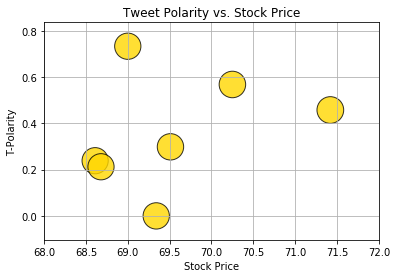

In [7]:
Date = stock_df["Date"]
stock_price = stock_df["Price"]
t_polarity = stock_df["Tweet Polarity"]


plt.scatter(stock_price,t_polarity,s=10*stock_price, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)
price_min = math.floor(min(stock_price))
price_max = math.ceil(max(stock_price))
plt.title("Tweet Polarity vs. Stock Price")
plt.ylabel("T-Polarity")
plt.xlabel("Stock Price")
plt.xlim(price_min,price_max)
plt.grid(True)

plt.show()

## Calculate R-Square

In [8]:
from scipy import stats
x = stock_price
y = t_polarity
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [9]:
print ("%s r-squared: " % ticker, r_value**2)

MPC r-squared:  0.090858187381


## Functions

In [12]:
# Scatter Plot for Ticker
def plot_scatter(ticker):
    stock_df = df[df['Ticker'] == ticker]
    Date = stock_df["Date"]
    stock_price = stock_df["Price"]
    t_polarity = stock_df["Tweet Polarity"]


    plt.scatter(stock_price,t_polarity,s=10*stock_price, c="gold", 
                edgecolor="black", linewidths=1, marker="o", 
                alpha=0.8)
    price_min = math.floor(min(stock_price))
    price_max = math.ceil(max(stock_price))
    plt.title("Tweet Polarity vs. Stock Price")
    plt.ylabel("T-Polarity")
    plt.xlabel("Stock Price")
    plt.xlim(price_min,price_max)
    plt.grid(True)

    plt.show()

In [14]:
# R-Square for a Ticker
def r_square(ticker):
    x = stock_price
    y = t_polarity
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print ("%s r-squared: " % ticker, r_value**2)
    return r_value**2

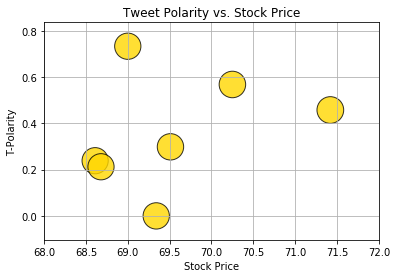

MPC r-squared:  0.090858187381


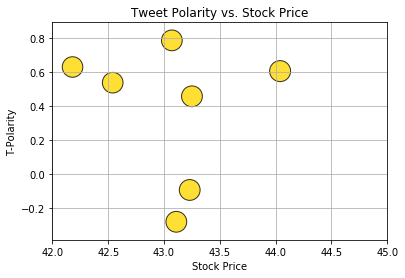

DVN r-squared:  0.090858187381


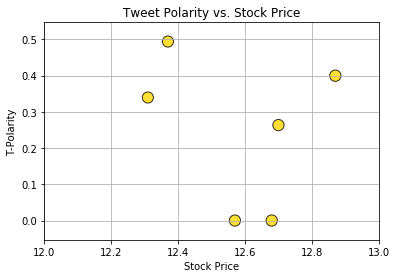

USO r-squared:  0.090858187381


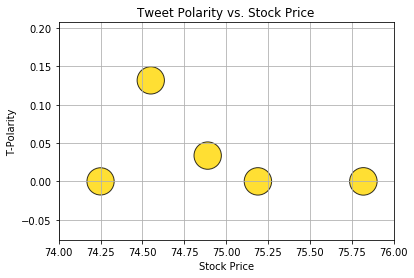

OXY r-squared:  0.090858187381


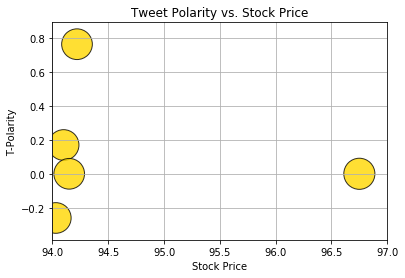

VLO r-squared:  0.090858187381


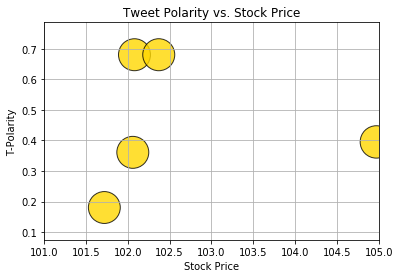

PSX r-squared:  0.090858187381


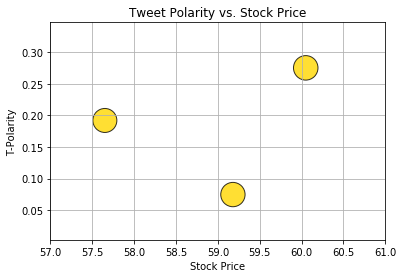

COP r-squared:  0.090858187381


In [16]:
ticker_list = df['Ticker'].unique()
for ticker in ticker_list:
    plot_scatter(ticker)
    r_square(ticker)